# MATH 6397 - Homework 2

In [1]:
# Gillespie algorithm
# Run this cell before running the code of any question.

import numpy as np
import time
# from numba import jit

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
# sns.set(style="whitegrid")


# @jit(nopython=True)
def ssaGillespie(x_init, prop, dx):
    """This function returns the time (tau) to next reaction and the population (x) after that reaction occurs.

    Attributes:
    x_init    population of species at the time.
    prop      propensity.
    dx        the change of population at each step (i.e., Post-Pre matrix).
    """

    alpha = np.sum(prop)
    alpha_r = np.cumsum(prop)
    tau = 1/alpha * np.log(1/np.random.uniform())
    k = np.min(np.where(np.random.uniform()*alpha < alpha_r))
    x_next = x_init + dx[k]
    return x_next, tau

## Question 1

In [2]:
# @jit(nopython=True)
def findPropensity(x_init, rate):
    """This function returns the propensity function.

    Attributes:
    x_init    population of species at the time.
    rate      reaction rate.
    """

    propensity = np.array([rate[0]*x_init[0],rate[1]*x_init[0]*x_init[1], rate[2]*x_init[1]])
    return propensity


# @jit(nopython=True)
def trajectory(x_init, rate, dx, T):
    """This function returns the population x(t) with 0 <= t <= T

    Attributes:
    x_init    population of species at the time.
    rate      reaction rate.
    dx        the change of population at each step (i.e., Post-Pre matrix).
    T         the maximum terminal time.
    """
    t = np.zeros(1)
    x = np.array([x_init])
    i = 0
    while t[-1] < T:
        prop = findPropensity(x[i], rate)
        if np.sum(prop) == 0:
            break
        x_next, tau = ssaGillespie(x[i], prop, dx)
        x = np.vstack((x,x_next))
        t = np.concatenate((t,t[i]+tau),axis=None)
        i+=1
    return x, t

**b)** Use the Gillespie algorithm to simulate trajectories from the model. Use $c_1 = 1, c_2 = 0.005, c_3 = 0.6.$


Computational time is 3.595057487487793 seconds.


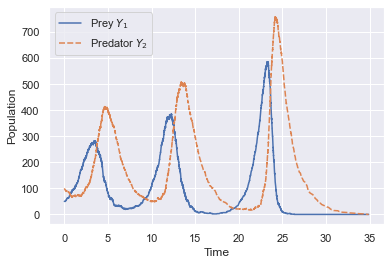

In [3]:
# Generate and plot some trajectories
# --- Intial Parameters
rate = np.array([1, 0.005, 0.6])
dx = np.array([[1,0],[-1,1],[0,-1]])
x_init = np.array([50,100])
T = 50


start = time.time()

# plotTrajectory(x_init, rate, dx, T)
x,t = trajectory(x_init, rate, dx, T)
time_pop = pd.DataFrame(x, t, columns=['Prey $Y_1$', 'Predator $Y_2$'])
# time_pop = time_pop.rolling(7).mean()
ax = sns.lineplot(data=time_pop)
ax.set(xlabel='Time', ylabel='Population')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
fig = ax.get_figure()
fig.savefig('1a.pdf',dpi=1200)

end = time.time()

print('Computational time is {t} seconds.'.format(t=end-start))
# print('Extinction time is {T}.'.format(T=t[-1]))

**c)** Use $c_1 = 1, c_2 = 1, c_3 = 0.6$. Species $Y_1$ goes extinct.

Computational time is 0.24876785278320312 seconds.


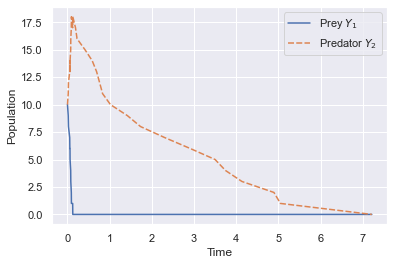

In [4]:
# --- Intial Parameters for species Y1 to go extinct
rate = np.array([1, 1, 0.6])
dx = np.array([[1,0],[-1,1],[0,-1]])
x_init = np.array([10,10])
T = 50


start = time.time()

x,t = trajectory(x_init, rate, dx, T)
time_pop = pd.DataFrame(x, t, columns=['Prey $Y_1$', 'Predator $Y_2$'])
ax = sns.lineplot(data=time_pop)
ax.set(xlabel='Time', ylabel='Population')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
fig = ax.get_figure()
fig.savefig('1c.pdf',dpi=1200)

end = time.time()

print('Computational time is {t} seconds.'.format(t=end-start))
# print('Extinction time is {T}.'.format(T=t[-1]))

## Question 2

**a)** Find the fixed points of the deterministic system

In [5]:
import numpy as np

# Intial Parameters
k = np.array([10, 1e3])
a = np.array([[1e-6, 1e-5],[1e-4, 1e-3]])
k_a = np.array([1e-5,1e-3])

for i in range(2):
    print('Case {n}'.format(n=i+1))
    coeff = [a[i,0]*k_a[i]/a[i,1],a[i,0],-k[i]]
    Xf = np.round(np.roots(coeff),7)
    Yf = np.round(a[i,0]/a[i,1]*Xf,7)
    print('Fixed points are ({x1},{y1}) and ({x2},{y2}).\n'.format(x1=Xf[0],x2=Xf[1],y1=Yf[0],y2=Yf[1]))

Case 1
Fixed points are (-3162.7776997,-316.27777) and (3161.7776997,316.17777).

Case 2
Fixed points are (-3162.7776997,-316.27777) and (3161.7776997,316.17777).



**b)** Run the Gillespie algorithm and show that the behavior is very different in the two cases.

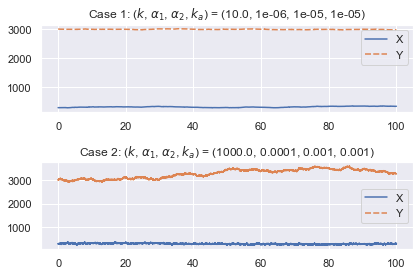

Computational time is 273.1601011753082 seconds.


In [7]:
# Propensity function for Question 2
def findPropensity2(x_init, rate):
    """This function returns the propensity function.

    Attributes:
    x_init    population of species at the time.
    rate      reaction rate.
    """

    prop = np.array([rate[0],
                     rate[0],
                     rate[1]*x_init[0]*x_init[1],
                     rate[2]*x_init[0], 
                     rate[3]*x_init[1]])
    return prop


def trajectory2(x_init, rate, dx, T):
    """This function returns the population x(t) with 0 <= t <= T

    Attributes:
    x_init    population of species at the time.
    rate      reaction rate.
    dx        the change of population at each step (i.e., Post-Pre matrix).
    T         the maximum terminal time.
    """
    t = np.zeros(1)
    x = np.array([x_init])
    i = 0
    while t[-1] < T:
        prop = findPropensity2(x[i], rate)
        if np.sum(prop) == 0:
            break
        x_next, tau = ssaGillespie(x[i], prop, dx)
        x = np.vstack((x,x_next))
        t = np.concatenate((t,t[i]+tau),axis=None)
        i+=1
    return x, t


# Generate and plot some trajectories
# --- Intial Parameters
dx = np.array([[1,0],
               [0,1],
               [-1,-1],
               [-1,0],
               [0,-1]])

x_init = np.array([300,3000])
T = 100


start = time.time()

fig, axes = plt.subplots(2, 1)

for i in range(2):
    rate = np.array([k[i], k_a[i], a[i,0], a[i,1]])
    x,t = trajectory2(x_init, rate, dx, T)
    time_pop = pd.DataFrame(x, t, columns=['X', 'Y'])
    sns.lineplot(data=time_pop, ax=axes[i])
    axes[i].set_title(r'Case {n}: ($k$, $\alpha_1$, $\alpha_2$, $k_a$) = ({K}, {a1}, {a2}, {Ka})'.format(n=i+1, K=k[i], Ka=k_a[i], a1=a[i,0], a2=a[i,1]))

    
plt.tight_layout()
plt.show()
fig.get_figure()
fig.savefig('2b.pdf',dpi=1200)

end = time.time()

print('Computational time is {t} seconds.'.format(t=end-start))

## Question 3

**b)** Draw phase portrait to check stability of fixed points.

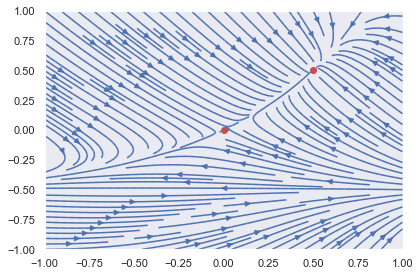

In [8]:
# Remove graph grid
sns.set_style("dark")

# Initial parameters
kl = 0
gp = gr = kp = k0 = 1
K = 0.5

# Function phi(p) for positive autoregulation
def pphi(p,n,k0,K):
    """This function returns the value of phi(p) when n=1 or n=10 
    in positive autoregulation.

    Attributes:
    p     protein.
    n     order.
    k0,K  parameters.  
    """
    return k0*np.power((p/K),n)/(1+np.power((p/K),n))


# Vector fields, case n = 1
n = 1
w = 1
p,r = np.mgrid[-w:w:100j, -w:w:100j] 

U = kl + pphi(p,n,k0,K) - gr*r
V = r*kp - gp*p
speed = np.sqrt(U**2 + V**2) 
  
# Creating plot 
fig = plt.figure()
plt.plot(0,0,'ro') 
plt.plot(0.5,0.5,'ro') 
plt.streamplot(r, p, U, V, density = 1.5) 
plt.tight_layout()

# Show plot 
plt.show() 

# Save figure
fig.get_figure()
fig.savefig('3bn1.pdf',dpi=1200)

Fixed points are (0,0) and

((0.9990147351311439+0j),(0.9990147351311439+0j))

((0.5000000000000017+0j),(0.5000000000000017+0j))



/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


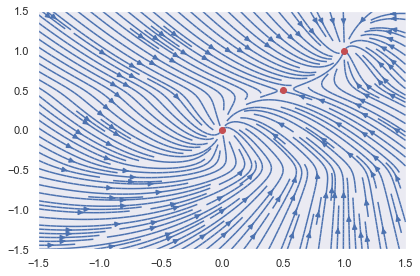

In [9]:
# Vector fields, case n = 10
n=10
w = 1.5
p,r = np.mgrid[-w:w:100j, -w:w:100j] 

U = kl + pphi(p,n,k0,K) - gr*r
V = r*kp - gp*p
speed = np.sqrt(U**2 + V**2) 

# Find other fixed points beside (0,0)
coeff = [1,-1, 0, 0, 0, 0, 0, 0, 0, 0, K**10]
sol = np.roots(coeff)
sol = sol[np.isreal(sol)]
print('Fixed points are (0,0) and\n')
for i in range(len(sol)):
    print('({x},{y})\n'.format(x=sol[i],y=sol[i]))


# Creating plot 
fig = plt.figure()
plt.plot(0,0,'ro') 
for i in range(len(sol)):
    plt.plot(sol[i],sol[i],'ro') 
plt.streamplot(r, p, U, V, density = 2) 
plt.tight_layout()

# Show plot 
plt.show() 

# Save figure
fig.get_figure()
fig.savefig('3bn2.pdf',dpi=1200)

**c)** Use the Gillespie algorithm to find and plot the stationary distribution of protein.

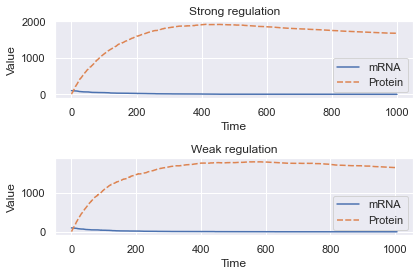

Computational time is 1.8831398487091064 seconds.


In [20]:
sns.set()

# Function phi(p) for negative autoregulation
def nphi(p,n,k0,K1):
    """This function returns the value of phi(p) when n=1 or n=10 
    in positive autoregulation.

    Attributes:
    p     protein.
    n     order.
    k0,K  parameters.  
    """
    return k0/(1+np.power((p/K1),n))


# Propensity function for Question 3
def findPropensity3(x_init, rate):
    """This function returns the propensity function.

    Attributes:
    x_init    population of species at the time.
    rate      reaction rate.
    """

    prop = np.array([rate[0],
                     rate[1]*x_init[0],
                     rate[2]*x_init[0], 
                     rate[3]*x_init[1]])
    return prop


# Simulate a trajectory by Gillespie SSA
def trajectory3(x_init, rate, dx, T, n, k0, K):
    """This function returns the population x(t) with 0 <= t <= T

    Attributes:
    x_init    population of species at the time.
    rate      reaction rate.
    dx        the change of population at each step (i.e., Post-Pre matrix).
    T         the maximum terminal time.
    """
    t = np.zeros(1)
    x = np.array([x_init])
    i = 0
    while t[-1] < T:
        prop = findPropensity3(x[i], rate)
        if np.sum(prop) == 0:
            break
        x_next, tau = ssaGillespie(x[i], prop, dx)
        x = np.vstack((x,x_next))
        t = np.concatenate((t,t[i]+tau),axis=None)
        if x_next[1] != x[i,1]:
            rate[0] = kl+nphi(x_next[1],n,k0,K) # update rate of first reaction as p change
        i+=1
    return x, t


# Intial Parameters
kl = 1e-3
kp = 0.17
k0 = 0.01
gp = 28e-5
gr = 83e-4

K = [1e2,1e4]
case = ['Strong regulation','Weak regulation']

x_init = np.array([100,5])
T = 1e3

dx = np.array([[1,0],
               [-1,0],
               [0,1],
               [0,-1]])

start = time.time()

fig, axes = plt.subplots(2, 1)
for i in range(2):
    rate = np.array([kl+nphi(x_init[1], n, k0, K[i]), gr, kp, gp])
    x,t = trajectory3(x_init, rate, dx, T, n, k0, K[i])
    time_pop = pd.DataFrame(x, t, columns=['mRNA', 'Protein'])
    sns.lineplot(data=time_pop,ax=axes[i])
    axes[i].set(xlabel='Time', ylabel='Value')
    axes[i].set_title(case[i])

    
plt.tight_layout()
plt.show()
fig.get_figure()
fig.savefig('3c.pdf',dpi=1200)

end = time.time()

print('Computational time is {t} seconds.'.format(t=end-start))

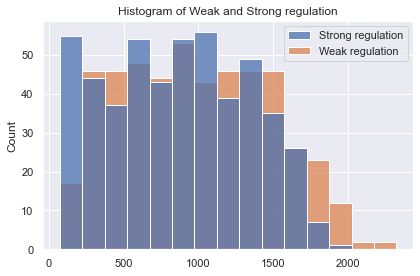

The ratio of the standard deviation to the mean of the distribution for strong regulation is 0.5360628035416339.

The ratio of the standard deviation to the mean of the distribution for strong regulation is 0.5007762996948194.

Computational time is 153.3063337802887 seconds.


In [52]:
# Find stationary distribution
ntrial = 500
T = 1000

s = np.zeros(shape=(ntrial,2))

start = time.time()

for i in range(2):
    for j in range(ntrial):
        x_init = np.array([np.random.randint(100),np.random.randint(100)])
        rate = np.array([kl+nphi(x_init[1], n, k0, K[i]), gr, kp, gp])
        x,t = trajectory3(x_init, rate, dx, T, n, k0, K[i])
        s[j,i]=x[-1,1]

pro = pd.DataFrame(s, columns=['Strong regulation','Weak regulation'])
fig = plt.figure()
pro_hist = sns.histplot(pro, kde=False)
plt.title('Histogram of Weak and Strong regulation')
plt.tight_layout()

# Show plot 
plt.show() 

# Save figure
fig.get_figure()
fig.savefig('3chist.pdf',dpi=1200)

end = time.time()

print('The ratio of the standard deviation to the mean of the distribution for strong regulation is {rs}.\n'.format(rs=np.std(s[:,0])/np.mean(s[:,0])))
print('The ratio of the standard deviation to the mean of the distribution for strong regulation is {rs}.\n'.format(rs=np.std(s[:,1])/np.mean(s[:,1])))
print('Computational time is {t} seconds.'.format(t=end-start))
